In [33]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

In [34]:

from src.pipeline.modules.clip import ClipFast
from src.pipeline.modules.helper.vision import rotation_image_proper
from src.pipeline.modules.cloth_matrix import ClothingSimilarity



from config.path import get_training_data_path
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [35]:
clip_instance = ClipFast(model_name='ViT-L/14')

In [36]:
class_name = 'sweatshirt'
relative_path = get_training_data_path('production', class_name)
fullpath = os.path.join(relative_path, 'frame2843_sweatshirt_jacket_.jpg')

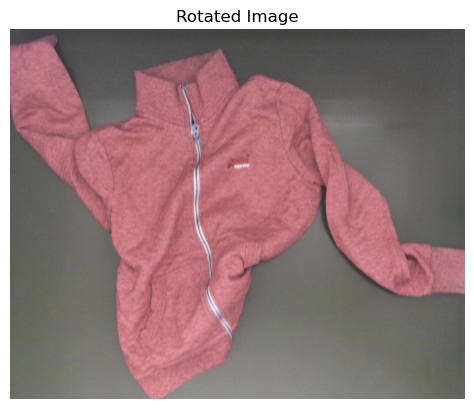

[['sweatshirt', 0.90185546875], ['jacket', 0.09808349609375]]


In [38]:
image = cv2.imread(fullpath)

rot_accuracy = []

rot_frame_rgb = image

# Display the rotated image using Matplotlib
plt.imshow(rot_frame_rgb)
plt.title('Rotated Image')
plt.axis('off')  # Hide axis
plt.show()

clip_instance.image = rot_frame_rgb
clip_instance.classes = ['sweatshirt', 'jacket']
res = clip_instance.process(image)
print(res)

In [ ]:

    underwear_matrix = np.array([
        [1.0, 0.7, 0.2],  # Pant
        [0.7, 1.0, 0.7],  # Short
        [0.2, 0.7, 1.0]   # Skirt
    ])

ClothingSimilarity.get_weighted_accuracy(1, clip_instance.classes, res, underwear_matrix)